In [1]:
import time
import os
import pandas as pd
# Import necessary functions and configs from other modules
# from evaluator import evaluate_results
# from model_analyzer import load_and_analyze_apps, ANALYZER_CONFIG
from combined import run_app_analysis_workflow_with_categories, analyze_and_evaluate_json_files

###  Use this for Scraping and Analyse the App From the Keyword 

In [ ]:
# --- Example 1 ---
# --- Default Categories to Scrape ---
CATEGORIES_TO_SCRAPE = {
    "Dating": "Dating app"
}

# --- Main Execution Block ---
if __name__ == "__main__":
    print("Running main workflow with default categories and configurations...")
    run_app_analysis_workflow_with_categories(CATEGORIES_TO_SCRAPE) # Run with default categories and configurations


### Analysing the Test Data

In [ ]:

# --- Default Categories to Scrape ---
json_files_to_analyze = ['test data/fraud-apps.json', 'test data/genuine-apps.json']
# --- Main Execution Block ---
if __name__ == "__main__":
    print("Running main workflow with default categories and configurations...")
    analyze_and_evaluate_json_files(json_files_to_analyze)

In [2]:
df= pd.read_csv('test_analysis_results.csv')
genuine_apps = pd.read_json('test data/genuine-apps.json')
fraud_apps = pd.read_json('test data/fraud-apps.json')

In [3]:
#if df appid in genuine_apps appid then genuine else fraud
df['original_label'] = df['app_id'].apply(lambda x: 1 if x in genuine_apps['appId'].values else 0)


--- Classification Metrics ---
Accuracy: 0.9200

Confusion Matrix:


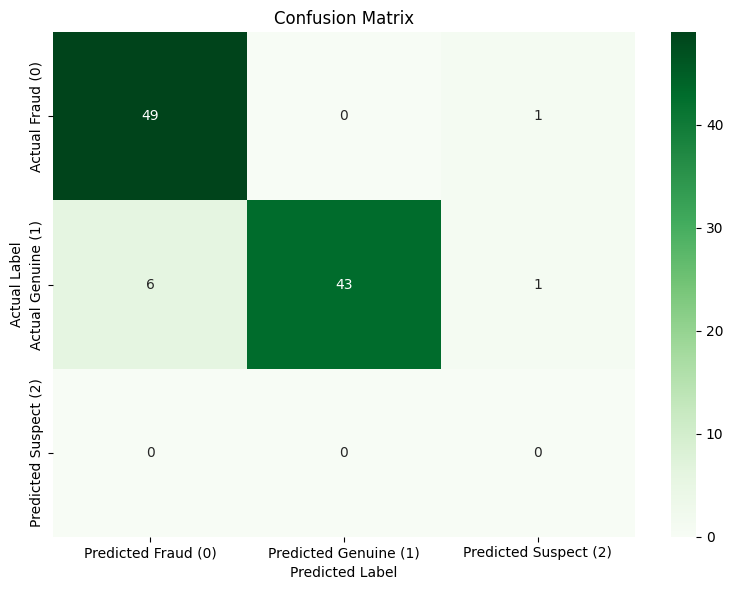


Classification Report:
              precision  recall  f1-score  support
0              0.890909    0.98  0.933333    50.00
1              1.000000    0.86  0.924731    50.00
2              0.000000    0.00  0.000000     0.00
accuracy       0.920000    0.92  0.920000     0.92
weighted avg   0.945455    0.92  0.929032   100.00


In [4]:
import pandas as pd
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
)
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = df['type']
y_true = df['original_label']
print("\n--- Classification Metrics ---")

# Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("\nConfusion Matrix:")
# print(conf_matrix)
# To make it more readable with labels:
conf_matrix_df = pd.DataFrame(conf_matrix,
                               index=['Actual Fraud (0)', 'Actual Genuine (1)','Predicted Suspect (2)'],
                               columns=['Predicted Fraud (0)', 'Predicted Genuine (1)', 'Predicted Suspect (2)']) # Adjust columns if needed
title="Confusion Matrix"

plt.figure(figsize=(8, 6))  # Adjust figure size as needed
sns.heatmap(conf_matrix_df, annot=True, cbar=True,cmap=plt.cm.Greens) # fmt for annotation format
plt.title(title)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

# print(conf_matrix_df)


# Classification Report (Precision, Recall, F1-Score, Support)
class_report = classification_report(y_true, y_pred,zero_division=0 , output_dict=True)
print("\nClassification Report:")

del class_report['macro avg']
# Print without macro avg
import pandas as pd
class_report = pd.DataFrame(class_report).transpose()
print(class_report)